# **Técnicas Avanzadas de Machine Learning**

---
---
<!-- Star Wars: Episodio VII - El despertar de la Fuerza -->

<!-- script html for image -->
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/4/49/Star_Wars_The_Force_Awakens.jpg' width="650" height="300" />

</figure></center>

Fuente de la imagen: [Wikipedia](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_VII_-_El_despertar_de_la_Fuerza)


# **Índice**

---


> [1 - Técnicas de Machine Learning en imágenes y vídeo](#scrollTo=bg3KcRu3j_YT)
>> [1.1. Antecedentes del Procesado de Imagen](#scrollTo=twp3rge1kfT9)
>>> [1.1.1. Los colores y la imagen digital](#scrollTo=kW0GPmY7lZVL)
>>>
>>> [1.1.2. Reconocimiento de formas](#scrollTo=zfc9-0RVplPE)
>>>
>> [1.2. Kernels y convolución](#scrollTo=LnWFAhk_o289)
>>
>> [1.3. Redes Neuronales Convolucionales o CNN](#scrollTo=odFmGxOarJQY)
>>> [1.3.1. Parte convolucional](#scrollTo=IVsR5QX2Ro_O)
>>>
>>> [1.3.2. Parte lineal](#scrollTo=rvHOTrplcq2e)
>>>
>> [1.4. Técnicas para compensar la escasez de recursos](#scrollTo=mqK1iExIgS4V)
>>> [1.4.1. Transferencia de aprendizaje (Transfer Learning)](#scrollTo=qig0IHP7w01y)
>>>
>>> [1.4.2. Aumento de datos (Data Augmentation)](#scrollTo=1nVxIVIuSHDd)
>>>
>> [1.5. Aplicaciones del Deep Learning al Procesado de Imagen](#scrollTo=zfW43urbfmvH)
>>> [1.5.1. Clasificación](#scrollTo=ohnDdoHktwFv)
>>>
>>> [1.5.2. Detección](#scrollTo=IzfdozU7S8P2)
>>>
>>> [1.5.3. Práctica: Detección de objetos con Faster R-CNN (PyTorch)](#scrollTo=_-natQngAKBs)
>>>
>>> [1.5.4. Segmentación](#scrollTo=zaTGc61aTzBy)
>>>
>>> [1.5.5. Práctica: Segmentación semántica con DeepLabV3 (PyTorch)](#scrollTo=Mlltx708BkIi)
>>
>> [1.6. Modelos generativos](#scrollTo=8iVqO6_Yue24)
>>> [1.6.1. Neural Style Transfer](#scrollTo=JgljfxW061s4)
>>>
>>> [1.6.2. Variational Auto Encoders](#scrollTo=Owkxuhx5AOel)
>>>
>>> [1.6.3. Redes Generativas Antagónicas (GAN)](#scrollTo=4zHuPWRBAmyL)
>>>
>> [Actividad 1: Clasificar artículos Fashion-MNIST con CNN (TensorFlow)](#scrollTo=XYWf0SGZMYcU)
>>
>>> [Solución](#scrollTo=s1KR0aXYXYbh&line=3&uniqifier=1)
>>
>> [Actividad 2: Clasificar entre perros y gatos con CNN y transferencia de aprendizaje (TensorFlow)](#scrollTo=eQ7tmWKNgLLU)
>>
>>> [Solución](#scrollTo=4FXP4_nuWdHW&line=3&uniqifier=1)
>>
> [Ideas clave](#scrollTo=4PoMfdM3kjUF)


# 1 - Técnicas de Machine Learning en imágenes y vídeo

El **Procesado de Imagen es un área tecnológica multidisciplinar**, ya que abarca desde cámaras y sensores, a psicología de la visión, neurociencia o algoritmia diversa.

Dentro de esta algoritmia, los **modelos basados en Deep Learning** tienen una presencia creciente en las aplicaciones de Procesado de Imagen y Vídeo en los últimos años.

## 1.1. Antecedentes del Procesado de Imagen

Antes de describir aplicaciones del Deep Learning a Procesado de Imagen, es conveniente esbozar los antecedentes, como nuestra **percepción del color**, que es la base del model típico de **imagen digital**, o nuestra **percepción de la forma de los objetos**.

### 1.1.1. Los colores y la imagen digital

En 1805 se postuló la **teoría tricromática**, y mucho después (en 1965) se descubrió que en el área fotorreceptora del ojo humano hay tres tipos de **conos** (células fotorreceptoras), cada uno de ellos especialmente sensible a una longitud de onda lumínica, que se corresponden con nuestra percepción de los colores **rojo, verde y azul o RGB**.

En la imagen siguiente se muestra la respuesta a la longitud de onda en función del tipo de cono: L (Large), M (Medium) o S (Short).

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/0/04/Cone-fundamentals-with-srgb-spectrum.svg' width="450" height="300" />
<figcaption>Imagen1. Respuesta a longitud de onda según tipo de cono </figcaption></center>
</figure>

Fuente de la imagen: [www.wikipedia.org](https://es.wikipedia.org/wiki/Percepci%C3%B3n_del_color)

<br>

<font color='Blue'><b> Modelo de imagen digital </b></font>

Por similitud con la visión humana, el modelo básico de imagen digital en **color** se compone de **tres matrices** bidimensionales, correspondiendo cada matriz a un color o canal. En caso de ser una imagen en **niveles de gris**, tendría un solo canal y estaría compuesta por **una sola matriz**.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/colorygris.png' width="600" height="310" />
<figcaption>Imagen2. Canales según tipo de imagen. </figcaption></center>
</figure>

Fuente de la imagen: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/colorygris.png)

\\

La dimensión de estas matrices se corresponde con el ancho (columnas) y alto (filas) de la imagen real representada como un rectángulo.

**El valor de cada pixel de estas matrices puede ser de dos tipos:**

*   Entero entre 0 y 255, siendo 0 la ausencia de color y 255 la máxima intensidad.

*   Real entre 0 y 1.

<br>

<font color='Blue'><b> Otros modelos </b></font>

Existen muchos otros formatos de imagen digital distintos al formato básico descrito. En el área de imagen médica, por ejemplo, las **tomografías** suelen codificarse en la **escala de Hounsfield**, en el que cada nivel de gris se corresponde con un tipo de tejido, con las siguientes referencias:

* El límite inferior son -1000 HU (Hounsfield Units), es el color negro y se corresponde con aire.

* El centro (0 HU) se corresponde con agua.

* El límite superior son 1000 HU, es el color blanco y se corresponde con hueso.

<!-- script html for image -->
<figure>
<center>
<img src='https://www.researchgate.net/profile/Mauricio-Tobon-Restrepo/publication/44960264/figure/fig2/AS:669540132339715@1536642215088/Figura-2-Esquema-que-representa-la-escala-de-Hounsfield-utilizada-para-establecer-la.ppm' width="450" height="300" />
<figcaption>Imagen3. Escala de unidades Hounsfield (HU) </figcaption></center>
</figure>

Fuente de la imagen: [www.researchgate.net](https://www.researchgate.net/figure/Figura-2-Esquema-que-representa-la-escala-de-Hounsfield-utilizada-para-establecer-la_fig2_44960264/download)


### 1.1.2. Reconocimiento de formas

Las primeras teorías de cómo reconocemos las formas se apoyan en la psicología de la **Gestalt** y el experimento de **Hubel y Wiesel**.

Según la Gestalt (principios del siglo XX), **nuestro cerebro tiende a inferir formas a partir de entidades de menor nivel**; así, percibimos superficies a partir de líneas, y objetos a partir de superficies.

Hubel y Wiesel, en su clásico experimento de 1959, demostraron que el sentido de la visión a bajo nivel en un gato (y por extrapolación, en el ser humano) se basa en dos tipos de agrupaciones nerviosas:

*   Unas simples, sensibles a la **rotación** y a la **posición** y limitadas a un espacio de visión **muy reducido**.

*   Otras más complejas, que son más **robustas frente a traslaciones**.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://www.researchgate.net/profile/Anh-Nguyen-282/publication/335707980/figure/fig1/AS:803803662127107@1568653135830/Fig-In-the-classic-neuroscience-experiment-Hubel-and-Wiesel-discovered-a-cats-visual.png' width="450" height="300" />
<figcaption>Imagen4. Recreación del experimento de Hubel y Wiesel (1959) </figcaption></center>
</figure>

Fuente de la imagen: [Understanding Neural Networks via Feature Visualization: A Survey](https://www.researchgate.net/publication/335707980_Understanding_Neural_Networks_via_Feature_Visualization_A_Survey)

\\

Posteriormente, se descubrió que estas agrupaciones nerviosas eran solo la primera parte de una **jerarquía de abstracción** a lo largo de la vía visual (*visual pathway*), de forma que en el otro extremo se perciben patrones complejos, como caras humanas.



## 1.2. Kernels y convolución
Inspirado en los trabajos de Hubel y Wiesel, se han venido utilizando algoritmos de Procesado de Imagen que explotan las relaciones entre píxeles cercanos. Por ejemplo, un algoritmo de **detección de bordes** (*edge detector*) aplica una **máscara o kernel** a cada pixel de entrada de forma que a la salida se obtiene un valor reducido si los valores de los píxeles cercanos son similares, y un valor elevado si hay grandes diferencias.

Un algoritmo de suavizado (*blurring*) realiza la operación inversa: el valor del píxel transformado viene dado por un cierto promedio de los valores de los píxeles cercanos.

Veamos tres ejemplos de aplicación de un kernel de detección de bordes verticales en distintos píxeles de una imagen:
* en el primer caso, la columna de tres píxeles a la derecha multiplicada por los correspondientes píxeles del kernel dan un **valor muy superior** a la columna de la izquierda, por lo que el resultado es elevado (334) y el **píxel resultante es blanco**
* en el segundo caso, **los valores son muy parecidos** y de signo contrario, por lo que el resultado es casi nulo (1) y el **píxel resultante es negro**
* en el tercer caso, **los valores de la derecha son muy inferiores** a los de la izquierda, por lo que el resultado es muy negativo (-368) y el **píxel resultante es nuevamente negro**

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/calc_conv.png' width="800" height="700" />
<figcaption>Imagen5. Aplicación de un kernel a tres píxeles. </figcaption></center>
</figure>

Fuente de la imagen: Elaboración propia a partir de https://setosa.io/ev/image-kernels/

\\
A continuación se muestra el resultado de aplicar dos kernel de detección de bordes a una imagen. El primer kernel detecta bordes verticales y el segundo detecta bordes horizontales.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/kernels.png' width="800" height="516" />
<figcaption>Imagen6. Ejemplo de kernels de detección de bordes. </figcaption></center>
</figure>

Fuente de la imagen: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/kernels.png)

\\
En [Image Kernels](https://setosa.io/ev/image-kernels/) se muestra el resultado de aplicar distintos kernel de detección de bordes sobre una imagen.

<br>
<p> <mark>SABÍAS QUE...</mark> </p>
<hr>

En general, esta **aplicación de un kernel a una imagen** se denomina **convolución**, y dio nombre posteriormente a las Redes Neuronales Convolucionales o CNN.


## 1.3. Redes Neuronales Convolucionales o CNN

Estas Redes tienen como objetivo aprovechar las capacidades de una Red Neuronal en la que los datos de entrada son imágenes, y explotar las relaciones entre píxeles cercanos mediante la aplicación de kernels.

En temas anteriores hemos descrito por encima Redes Neuronales Convolucionales como LeNet y AlexNet, basadas en kernels que conceptualmente son similares a los detectores de características (bordes) descritos por Hubel y Wiesel.

En la imagen siguiente se muestra la arquitectura de una Red Neuronal Convolucional típica, formada por una **parte convolucional** y una **parte lineal**.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/cnn.png' width="1000" height="350" />
<figcaption>Imagen7. Arquitectura de una Red Convolucional </figcaption></center>
</figure>

Fuente de la imagen: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/cnn.png)







### 1.3.1. Parte convolucional

La parte convolucional es la que realiza la función de **extracción de características** de las imágenes de forma jerárquica: las primeras capas detectan características de bajo nivel, como bordes o texturas, y el nivel de abstracción aumenta con las capas, de forma que las últimas capas detectan las características de alto nivel de cada imagen, como partes de un cuerpo, objetos, etc. En este proceso se suceden dos tipos de capas: **convolucional** y **reductora (*pooling*)**.

La imagen siguiente detalla cómo se deben **combinar y parametrizar estas capas en TensorFlow** para implementar la arquitectura mostrada anteriormente, así como las dimensiones que se obtienen a la salida de cada capa.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/cnn_tf.png' width="700" height="320" />
<figcaption>Imagen8. Implementación de una Red Neuronal Convolucional en TensorFlow </figcaption></center>
</figure>

Fuente de la imagen: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/cnn_tf.png)

<br>

<font color='Blue'><b> Capa convolucional </b></font>

La idea básica es utilizar máscaras o **kernel** como los descritos anteriormente para capturar relaciones espaciales contiguas; la particularidad en el caso de las CNN es que los kernel se aprenden a partir de las imágenes.

A modo de ejemplo, la siguiente imagen muestra los 96 **kernels** de tamaño 11×11 **aprendidos en la primera capa convolucional** a partir de un millón de imágenes de entrada con tamaño 224×224×3 en la **CNN AlexNet**.
<!-- script html for image -->

<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/alexnet-kernels.png' width="500" height="200" />
<figcaption>Imagen9. Kernels de primera capa convolucional de AlexNet (2012) </figcaption></center>
</figure>

Fuente de la imagen: [www.cs.toronto.edu](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf)

<br>

Veamos los parámetros de las capas convolucionales del ejemplo de arquitectura CNN:

* **Conv1**: va a generar 32 kernel de tamaño (3, 3). A la entrada habrá imágenes de dimensión (28, 28, 1), y la salida pasará por una función de activación ReLU.

* **Conv2**: se diferencia de Conv1 en que genera 64 kernel y en que la dimensión de la entrada es implícita (será la salida de la capa anterior, MaxPool1).

* **Conv3**: se diferencia de Conv2 en que genera 128 kernel.

Dejamos para el final el parámetro "*padding*" o tipo de relleno. En nuestro caso su valor es "*same*", que significa que **la salida de la entrada tiene las mismas dimensiones que la salida.** Esto implica que al aplicar el kernel a celdas en los límites izquierda/derecha o inferior/superior, habrá valores no definidos por lo que debe rellenarse el perímetro exterior con valor 0, como se comprueba en la imagen siguiente.

<!-- script html for image -->
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/example_padding_same.png?raw=true' width="800" height="400" />
<figcaption>Imagen10. Ejemplo de relleno con 0 para padding="same" </figcaption></center>
</figure>

Fuente de la imagen: [https://images.deepai.org](https://images.deepai.org/django-summernote/2019-05-27/c3f24854-5584-4feb-81d7-3bcc5800a689.png)


<br>
<p> <mark>IMPORTANTE</mark> </p>
<hr>

El otro valor posible del tipo de relleno es "**valid**", con lo que **NO se produce relleno**, a costa de disminuir las dimensiones por no poderse aplicar el kernel en los bordes.

Referencia: [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

<br>

<font color='Blue'><b> Capa reductora (pooling) </b></font>

La función de este tipo de capa es la reducción de información; en concreto, la idea de esta capa es equilibrar el aumento de profundidad característico de las capas convolucionales con una disminución de las dimensiones espaciales (alto-ancho).

Esta disminución se consigue **sustituyendo rectángulos de valores por un valor característico del rectángulo**. En el tipo **Max Pooling** este valor característico es el máximo, y en el tipo **Average Pooling** es la media.

En nuestro ejemplo de CNN, todas las capas de Max Pooling tienen como parámetro (2, 2), por lo que reducen ambas dimensiones espaciales a la mitad. Así, las reducciones resultantes son:
* **MaxPool1**: (28, 28) a (14, 14)
* **MaxPool2**: (14, 14) a (7, 7)
* **MaxPool3**: (7, 7) a (3, 3)

Referencia: [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

<br>
<p> <mark> IMPORTANTE </mark> </p>
<hr>

**Es frecuente encontrar capas *Dropout* después de las capas Convolucionales.** No las mencionamos porque no afectan a la arquitectura, aunque como ya sabemos **pueden ser importantes para prevenir overfitting.**

### 1.3.2. Parte lineal

La parte lineal de una CNN es un perceptrón multicapa cuya finalidad es realizar la clasificación.

La primera capa es de tipo *Flatten* y tiene como función transformar a una dimensión la salida de la parte convolucional.

El resto de capas son de tipo *Dense* (lineal o densamente conectada), que ya conocemos por ser típicas de un perceptrón multi-capa:

* **Dense1**: la dimensión de salida es 128 y la función de activación es ReLU.

* **Dense2**: se diferencia de Dense1 en que la dimensión de salida es 64.

* **Dense3**: se diferencia de Dense2 en que la dimensión de salida es 10 y la función de activación es softmax.

Referencia: [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

<br>
<p> <mark> PIENSA UN MINUTO </mark> </p>
<hr>

¿Por qué la salida de la capa Flatten tiene dimensión igual a 1152?

## 1.4. Técnicas para compensar la escasez de recursos

Uno de los inconvenientes de un modelo de Deep Learning complejo es que requiere un dataset masivo y mucha capacidad de computación.

Afortunadamente, disponemos de técnicas como la **transferencia de aprendizaje (Transfer Learning)** y el **aumento de datos (Data Augmentation)** que permiten entrenar datasets con reducido número de imágenes y en entornos de capacidad de computación limitada.


### 1.4.1. Transferencia de aprendizaje (Transfer Learning)

El **Transfer Learning** se ideó para reutilizar modelos de muchas capas ya entrenados con datasets masivos y que han necesitado gran capacidad de computación. **Consiste en utilizar parte de un modelo complejo y re-entrenarlo parcialmente con nuestro dataset**, normalmente mucho más reducido que con el que se entrenó originalmente el modelo.

Se suelen seguir los pasos siguientes:

1. Se **reutiliza la parte convolucional**, congelando sus pesos.

2. Se **sustituye el clasificador** (que normalmente estará entrenado para otras clases distintas a las de nuestro dataset) por uno específico para nuestro caso.

3. Se **entrena el modelo híbrido con nuestro dataset**, aunque solo se modificarán los pesos del clasificador.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/trans_learn.png' width="1000" height="350" />
<figcaption>Imagen11. Transfer Learning </figcaption></center>
</figure>

Fuente de la imagen: [Elaboración propia](https://github.com/albertojulian/master-ub/raw/main/cnn.png)


### 1.4.2. Aumento de datos (Data Augmentation)

Uno de los motivos por los que un modelo de Deep Learning puede presentar sobreajuste (overfitting) es que el dataset tenga pocos ejemplos, con lo que el modelo no consigue generalizar suficientemente.

El **aumento de datos** es una técnica para contrarrestar la escasez de datos, típicamente imágenes, frecuente en áreas como medicina o inspección visual industrial.

En ocasiones esta escasez puede darse solo en alguna clase que esté infrarrepresentada, con lo cual es difícil que el modelo la "aprenda" bien. En ese caso, debe aplicarse aumento de datos solo a las clases escasas.

**La aumentación consiste en aplicar transformaciones al dataset de entrada para que el entrenamiento sea más generalizado.** Entre estas transformaciones podemos encontrar:

* Rotaciones.
* Translaciones.
* Inversiones espaciales.
* Cambios en la relación de aspecto.
* Cambios en el brillo o contraste.
* Combinaciones de las transformaciones anteriores.

En combinación con el *dropout*, la aumentación de datos se utiliza para combatir el **overfitting**.

<br>
<p> <mark> IMPORTANTE </mark> </p>
<hr>

La aumentación debe aplicarse **únicamente sobre el dataset de entrenamiento**.

Por otro lado, debe conocerse el contexto del problema a resolver, ya que no siempre se pueden aplicar todas las transformaciones.

## 1.5. Aplicaciones del Deep Learning al Procesado de Imagen

Las CNN y la transferencia de aprendizaje son pilares básicos de la mayor parte de aplicaciones de Deep Learning al Procesado de Imagen.

Estas aplicaciones son las más frecuentes:

* Clasificación

* Detección

* Segmentación

### 1.5.1. Clasificación

Esta es la aplicación más utilizada, y además es la base de otras aplicaciones. Ya hemos visto algunos modelos de CNN que permiten realizar clasificación, como **AlexNet o VGGNet**, y las dos actividades al final de este notebook son de clasificación.

<br>

<font color='Blue'><b> ResNet </b></font>

El modelo ResNet se ha implementado en configuraciones de 34, 50, 101 y 152 capas, y es muy utilizado como *backend* de modelos que no son de clasificación, como veremos en breve.

En la imagen siguiente se aprecian algunas diferencias del modelo ResNet con respecto a una CNN básica.

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/resnet.png' width="1000" height="150" />
<figcaption>Imagen12. Modelo ResNet de 34 capas </figcaption></center>
</figure>

Fuente de la imagen: [He, 2015](https://arxiv.org/pdf/1512.03385.pdf)

Como vemos, hay una diferencia visible: **a la salida de cada bloque de dos capas convolucionales se suma la salida con la entrada del bloque**. En la imagen siguiente se aprecia este **bloque residual** en dos versiones:
* para ResNet-34, con dos capas convolucionales por bloque
* para ResNet-50/101/152, con tres capas convolucionales por bloque

<!-- script html for image -->
<figure>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/resnet-residuo.png' width="600" height="250" />
<figcaption>Imagen13. Bloque residual en dos versiones </figcaption></center>
</figure>

Fuente de la imagen: [He, 2015](https://arxiv.org/pdf/1512.03385.pdf)

El efecto en ambos casos es el mismo: evitar que la salida del **bloque residual** pueda ser nula, con lo que se **dificulta la anulación de gradiente (*vanishing gradient*)** y se pueden entrenar redes con muchas capas.

Hay otra diferencia respecto a las capas de reducción de superficie (*pooling*): no se insertan después de cada capa convolucional (como ocurre en una CNN básica), sino cada 6, 8, 10 capas. Se indican con un "/2".

### 1.5.2. Detección

La detección de objetos supone un nivel de dificultad adicional con respecto a la clasificación, ya que pueden detectarse varios objetos en la misma imagen, incluso de la misma clase, y además estamos interesados en su ubicación en la imagen.

En detección de objetos es fundamental definir con eficiencia y precisión el **marco delimitador (*Bounding Box*)** de los objetos.

\\
**Familia de modelos R-CNN**

Hay modelos, como R-CNN, Fast R-CNN y Faster R-CNN que realizan **propuestas de regiones**, 2000 en el modelo R-CNN original, y ejecutan una clasificación en cada una de esas regiones para determinar si contiene alguna de las clases predefinidas.

La imagen siguiente muestra el esquema de detección en **Faster R-CNN**: una única CNN genera mapas de características que se entrena para propuestas de regiones y para clasificación.

<!-- script html for image -->
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/faster_r-cnn.png' width="400" height="400" />
<figcaption>Imagen14. Esquema de detección en Faster R-CNN </figcaption></center>
</figure>

Fuente de la imagen: [Ren et al. 2015](https://arxiv.org/pdf/1506.01497.pdf)

En estos modelos es muy importante la métrica **IoU (*Intersection over Union*)**, que se define con respecto a dos superficies: la predicción del marco delimitador frente a la del marco delimitador definido por el usuario en las imágenes de prueba. La métrica IoU equivale al **índice de Jaccard** en teoría de conjuntos.

En la imagen siguiente se ilustra la métrica IoU.

<!-- script html for image -->
<center>
<img src='https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png' width="400" height="300" />
<figcaption>Imagen15. Concepto de IoU, Intersection over Union </figcaption></center>
</figure>

Fuente de la imagen: [www.pyimagesearch.com/](https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png)

Como puede apreciarse en la imagen anterior, el valor de IoU puede ser bajo por dos motivos: que ambos marcos estén muy separados entre sí o que sus tamaños sean muy distintos. Se considera 0.5 como valor mínimo aceptable.

\\
**Otros modelos de detección**

La familia de modelos **YOLO** (*You Only Look Once*) se diferencia de la familia **R-CNN** porque sus modelos se componen de capas lineales en lugar de convolucionales.

Son modelos más adecuados para video porque son más rápidos, si bien detectan peor los objetos pequeños.


### 1.5.3. Práctica: Detección de objetos con Faster R-CNN (PyTorch)

Vamos a realizar una detección de objetos sobre dos imágenes del dataset [ADE20K](https://groups.csail.mit.edu/vision/datasets/ADE20K/), en las que se aprecian varios automóviles y varias personas.

Para detectar objetos en las imágenes, vamos a utilizar el modelo pre-entrenado [Faster R-CNN]( https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/).

Empezamos importando los paquetes.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
import torchvision
import torch
import numpy as np
import cv2
import os

<font color='Blue'><b> Carga de Faster R-CNN </b></font>

Cargamos el modelo pre-entrenado Faster R-CNN, que a su vez **utiliza la parte convolucional de ResNet50**, y definimos las mismas etiquetas con las que ha sido entrenado.

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 107MB/s]


<font color='Blue'><b> Función para Detección de objetos </b></font>

Definimos la función que va a ejecutar el modelo para detectar los objetos de la imagen proporcionada. El parámetro *threshold* (umbral) sirve para filtrar aquellos marcos delimitadores cuya probabilidad sea inferior al umbral.

In [3]:
def get_prediction(img_path, model, threshold):
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

def object_detection_api(img_path, model, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  boxes, pred_cls = get_prediction(img_path, model, threshold)
  boxes = [[(int(a), int(b)) for (a,b) in box] for box in boxes] # convert boxes to int
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_orig = img.copy()
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img, pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0), thickness=text_th)
  fig, (ax1, ax2) = plt.subplots(figsize=(15, 7), ncols=2)

  ax1.imshow(img_orig)
  ax1.axis('off')
  ax1.set_title('Imagen original')

  ax2.imshow(img)
  ax2.axis('off')
  ax2.set_title('Detección de objetos')

  plt.tight_layout()

<font color='Blue'><b> Carga de las imágenes de prueba </b></font>

In [4]:
!wget https://github.com/albertojulian/master-ub/raw/main/labelme_dvkvazcsyvkumig.jpg
!wget https://github.com/albertojulian/master-ub/raw/main/labelme_fbpgpaxesdmtnqy.jpg

--2024-11-03 19:20:50--  https://github.com/albertojulian/master-ub/raw/main/labelme_dvkvazcsyvkumig.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/albertojulian/master-ub/main/labelme_dvkvazcsyvkumig.jpg [following]
--2024-11-03 19:20:51--  https://raw.githubusercontent.com/albertojulian/master-ub/main/labelme_dvkvazcsyvkumig.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363732 (355K) [image/jpeg]
Saving to: ‘labelme_dvkvazcsyvkumig.jpg’

labelme_dvkvazcsyvk 100%[===================>] 355.21K  --.-KB/s    in 0.03s   

2024-11-03 19:20:51 (11.4 MB/s) - ‘labelme_dvkvazcsyvkumig.jpg’ sa

In [5]:
threshold=0.8

img_path = "./labelme_dvkvazcsyvkumig.jpg"
object_detection_api(img_path, model, threshold=threshold)

img_path = "./labelme_fbpgpaxesdmtnqy.jpg"
object_detection_api(img_path, model, threshold=threshold)

Output hidden; open in https://colab.research.google.com to view.

### 1.5.4. Segmentación

La segmentación consiste en la clasificación de una imagen a nivel de píxel de forma que a la salida la imagen queda segmentada en regiones que tienen una etiqueta y color comunes.

Es fundamental en vehículos autónomos, ya que el sistema de conducción autónoma necesita saber en todo momento qué hay alrededor para actuar en consecuencia.

Existen varios tipos de segmentación:

* **Semántica o de clase**, en la que se asigna un identificador a cada clase; por ejemplo, el cielo tendrá un identificador y las personas otro.

* De **instancia**, en la que únicamente se identifican objetos y se diferencian entre sí aunque sean de la misma clase; por ejemplo, cada persona tendría un identificador diferente. Es **complementaria con la detección de objetos**: siempre que se ha segmentado una instancia se puede limitar con un marco delimitador.

* **Panóptica**, que aúna las dos anteriores, dando un identificador de clase a las partes sin forma definida (cielo, calle, césped) y un identificador de clase y de instancia a los objetos (personas, coches, animales).

A modo de ejemplo, mostramos el esquema de **segmentación de instancia** de **Mask R-CNN**, que es una evolución del esquema de Faster R-CNN para detección de objetos.

<!-- script html for image -->
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/mask-rcnn.png' width="400" height="200" />
<figcaption>Imagen16. Esquema de segmentación de instancia en Mask R-CNN </figcaption></center>
</figure>

Fuente de la imagen: [He et al. 2017](https://arxiv.org/pdf/1703.06870.pdf)

En el modelo Mask R-CNN el mapa de características de la CNN se entrena para predicción de máscaras, en paralelo a las propuestas de regiones y la clasificación (que vimos en Faster R-CNN). Estas máscaras son las que van a segmentar las instancias.

### 1.5.5. Práctica: Segmentación semántica con DeepLabV3 (PyTorch)

Vamos a realizar una segmentación semántica sobre dos imágenes del dataset [ADE20K](https://groups.csail.mit.edu/vision/datasets/ADE20K/), en las que se aprecian varios automóviles y varias personas.


In [6]:
import torch
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

<font color='Blue'><b> Carga de DeepLabV3 </b></font>

Para segmentar semánticamente las imágenes vamos a utilizar el modelo pre-entrenado [DeepLabV3]( https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/), que a su vez **utiliza la parte convolucional de ResNet101**.

In [7]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:02<00:00, 83.4MB/s]


<font color='Blue'><b> Función para Segmentación semántica </b></font>

Definimos la función que va a ejecutar el modelo para segmentar la imagen proporcionada.

Como el modelo que vamos a utilizar ha sido entrenado con ImageNet, tenemos que normalizar nuestras imágenes de entrada con los valores de ImageNet:
* mean = [0.485, 0.456, 0.406]
* std = [0.229, 0.224, 0.225]

Trabajaremos con 21 clases pre-definidas para las que ha sido entrenado el modelo. Así, a la salida del modelo cada píxel estará identificado por un número entre 0 y 20.

Finalmente, se mapean los valores de clase de cada pixel con valores RGB para ayudar en la visualización.

In [8]:
def decode_segmap(image, nc=21):

  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)

  for l in range(0, nc):
    # idx devuelve los índices de la imagen cuyo identificador es "l"
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]

  rgb = np.stack([r, g, b], axis=2)
  return rgb

def segment(net, path, dev='cuda'):
  img = Image.open(path)
  trf = T.Compose([T.Resize(640),
                   T.ToTensor(),
                   T.Normalize(mean = [0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])])

  # unsqueeze(0) añade una columna al principio a modo de dimensión de lote
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)

  fig, (ax1, ax2) = plt.subplots(figsize=(15, 7), ncols=2)
  ax1.imshow(img)
  ax1.axis('off')
  ax1.set_title('Imagen original')

  ax2.imshow(rgb)
  ax2.axis('off')
  ax2.set_title('Segmentación semántica')

  plt.tight_layout()
  #plt.show()

<font color='Blue'><b> Carga de las imágenes de prueba </b></font>


In [9]:
!wget https://github.com/albertojulian/master-ub/raw/main/labelme_dvkvazcsyvkumig.jpg
!wget https://github.com/albertojulian/master-ub/raw/main/labelme_fbpgpaxesdmtnqy.jpg

--2024-11-03 19:21:35--  https://github.com/albertojulian/master-ub/raw/main/labelme_dvkvazcsyvkumig.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/albertojulian/master-ub/main/labelme_dvkvazcsyvkumig.jpg [following]
--2024-11-03 19:21:35--  https://raw.githubusercontent.com/albertojulian/master-ub/main/labelme_dvkvazcsyvkumig.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363732 (355K) [image/jpeg]
Saving to: ‘labelme_dvkvazcsyvkumig.jpg.1’

labelme_dvkvazcsyvk 100%[===================>] 355.21K  --.-KB/s    in 0.03s   

2024-11-03 19:21:35 (11.5 MB/s) - ‘labelme_dvkvazcsyvkumig.jpg.1

<font color='Blue'><b> Ejecución de la segmentación </b></font>

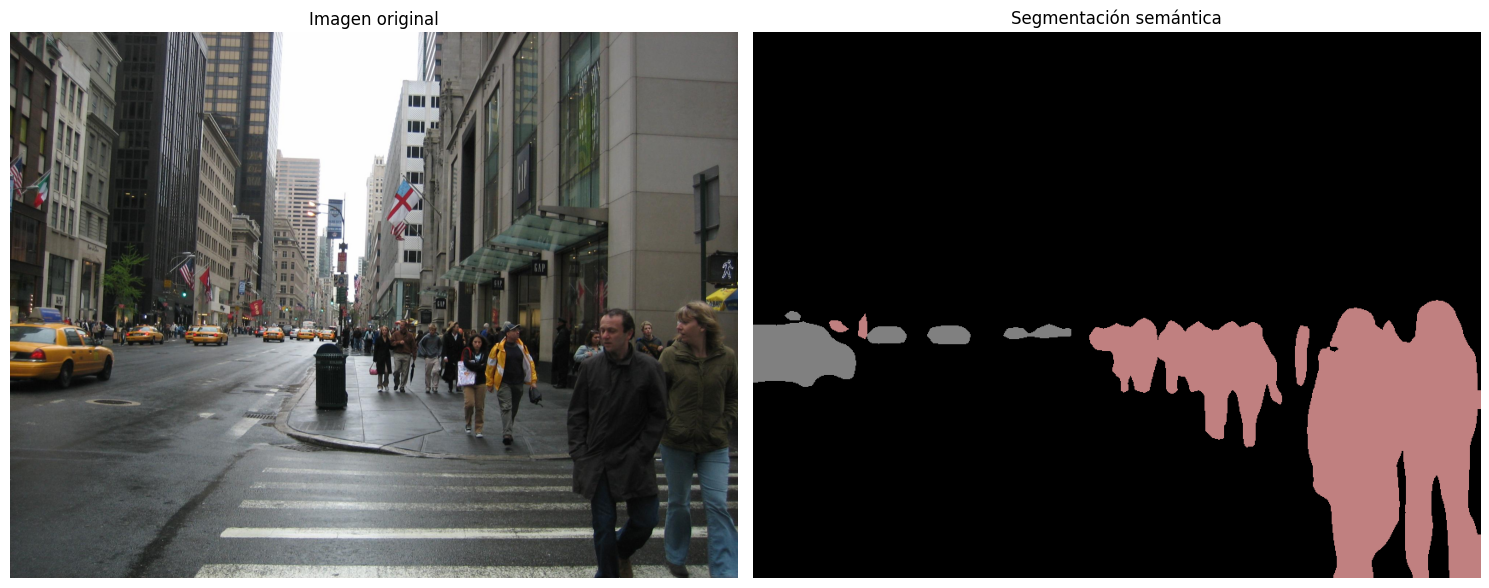

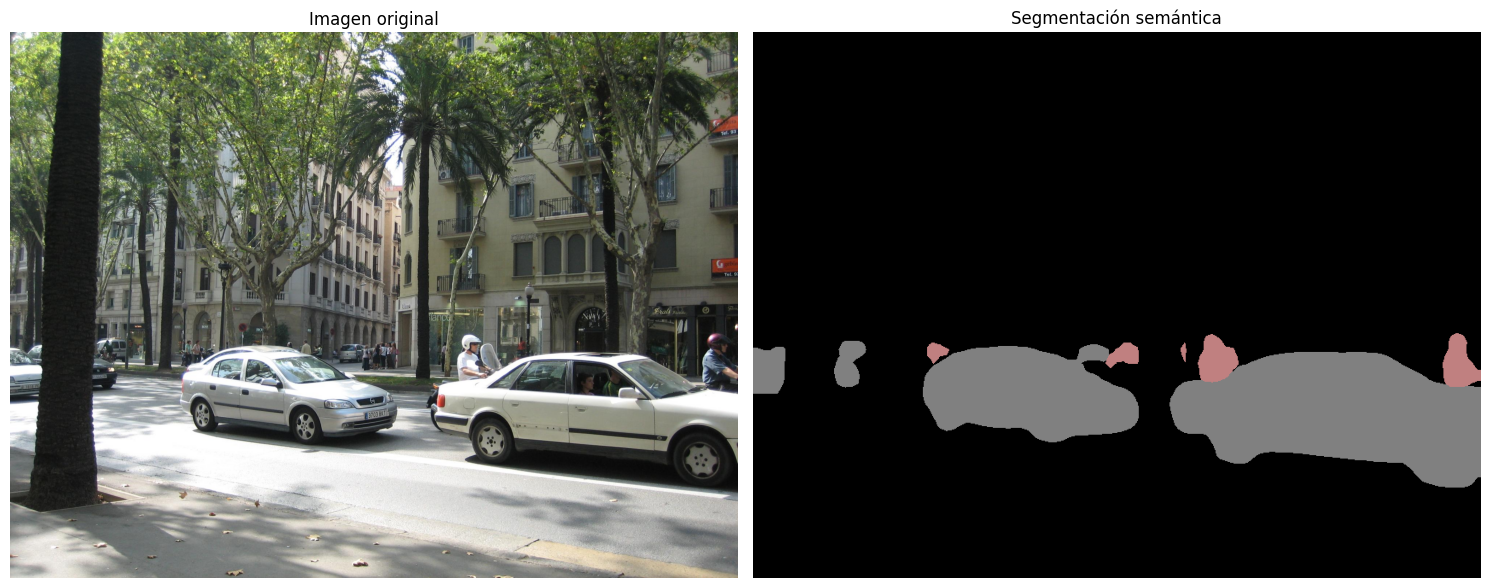

In [10]:
segment(dlab, './labelme_dvkvazcsyvkumig.jpg')
segment(dlab, './labelme_fbpgpaxesdmtnqy.jpg')

## 1.6. Modelos generativos

En los últimos años han surgido diversos modelos de generación de imágenes, entre los que podemos destacar:

* Neural Style Transfer.

* Variational Auto Encoders (VAE).

* Redes Generativas Antagónicas (GAN).

Todos ellos explotan de alguna forma la capacidad de extracción de características de una CNN pura (sin clasificador).


### 1.6.1. Neural Style Transfer

El modelo Neural Style Transfer genera una imagen que combina características de dos imágenes:

* El **estilo** de una imagen (que suele ser un cuadro), a partir de las características de bajo nivel de la imagen, extraídas de la capas de una CNN más cercanas a la entrada; en el "estilo" englobamos el color, los trazos, las texturas...

* El **contenido** de otra imagen (que suele ser una foto), a partir de las características más abstractas de esa imagen, extraídas de las capas de una CNN más alejadas de la entrada; por "contenido" entendemos las principales formas de la imagen.

La imagen siguiente muestra un ejemplo de transferencia de estilo.

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://github.com/md-lorente/Master_BD_DS/raw/main/m%C3%B3dulo_7_aprendizaje_autom%C3%A1tico_para_machine_learning/style.png' width="650" height="350" />
<figcaption> Imagen17. Neural Style Transfer </figcaption></center>
</figure>

Fuente de la imagen: [Wikipedia: Vassily Kandinsky, 1913 - Composition 7](https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1913_-_Composition_7.jpg) y [elaboración propia](https://github.com/albertojulian/master-ub/raw/main/style.png)

### 1.6.2. Variational Auto Encoders

Los Variational Auto Encoders o VAE son una variante del modelo *Encoder-Decoder*. Una idea fundamental de este modelo es que la capa final de una Red Convolucional pura es un espacio de baja dimensionalidad que representa de forma compacta las imágenes de entrenamiento. Este espacio recibe el nombre de **espacio latente** (*latent space*). También se le conoce como *embedding*.

Aplicando capas con funciones inversas a las capas convolucionales y reductoras podemos recuperar una imagen parecida a la original.

La imagen siguiente es un esquema de un *Variational Autoencoder*, que se diferencia del modelo Encoder-Decoder en que coge las muestras del espacio latente de forma aleatoria según una distribución normal.

<!-- script html for image -->
<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/a/a3/VAE_Basic.jpg' width="800" height="370" />
<figcaption>Imagen18. Esquema de un Variational Autoencoder </figcaption></center>
</figure>

Fuente de la imagen: [www.wikipedia.org](https://upload.wikimedia.org/wikipedia/commons/a/a3/VAE_Basic.jpg)





### 1.6.3. Redes Generativas Antagónicas (GAN)
Las Redes Generativas Antagónicas comparten con los Auto Encoders el concepto de **espacio latente**.

En su versión original estaban compuestas por un **Generador** (equivalente al decodificador del VAE) y un **Discriminador**.

El Discriminador está entrenado con imágenes reales y su función es decidir si la imagen que le llega es real o ha sido creada por el Generador.

Al principio el Generador genera contenido aleatorio (*ruido*). A medida que avanza el entrenamiento, la diferencia entre la salida del Generador y las imágenes reales es cada vez menor, hasta que las imágenes a la salida del Generador son tan parecidas a las reales que el Discriminador no las puede diferenciar.

En la imagen siguiente se muestra el **esquema de una GAN**.

<!-- script html for image -->
<figure>
<center>
<img src='https://4.bp.blogspot.com/-YTGLQjhch-Q/Wz475NU2TSI/AAAAAAAAsu4/zaC_wfZBX80dePLflgQUaAaxE72od3VCgCEwYBhgL/s1600/Figura_2.png' width="800" height="570" />
<figcaption>Imagen19. Esquema de una GAN </figcaption></center>
</figure>

Fuente de la imagen: [www.wikipedia.org](https://upload.wikimedia.org/wikipedia/commons/a/a3/VAE_Basic.jpg)


<br>
<p> <mark>SABIAS QUE...</mark> </p>
<hr>

En la actualidad, las GAN pueden generar imágenes de mucha calidad y realismo, como las que se generan mediante el modelo StyleGAN en la página web: https://thispersondoesnotexist.com.



## Actividad 1: Clasificar artículos Fashion-MNIST con CNN (TensorFlow)

El dataset de imágenes [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) fue creado en 2017 por la empresa Zalando para sustituir al dataset [MNIST](http://yann.lecun.com/exdb/mnist/) ("Modified National Institute of Standards and Technology") de dígitos que se ha venido utilizando como banco de pruebas en los primeros años del Deep Learning aplicado a imágenes.

Tal como se indica en la web de [Zalando](https://research.zalando.com/project/fashion_mnist/fashion_mnist/), Fashion-MINST subsana limitaciones que presenta MNIST:

*   Ha dejado de ser significativo el que un modelo de Machine Learning o Deep Learning ofrezca buenos resultados sobre MNIST, ya que se alcanza fácilmente accuracy del 97% para ML y 99% para DL.

*   Resulta demasiado sencillo para tareas modernas de Procesado de Imagen, y por lo tanto no es representativo  (ver [tweet](https://twitter.com/fchollet/status/852594987527045120) de François Chollet).

<!-- script html for image -->
<figure>
<center>
<br>
<center>
<img src='https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png' width="600" height="600" />
<figcaption>Imagen20. Muestra de Fashion-MNIST </figcaption></center>
</figure>

Fuente de la imagen: [https://research.zalando.com](https://research.zalando.com/project/fashion_mnist/fashion_mnist/img/fashion-mnist-sprite.png)

\\

### Consideraciones
Fashion-MNIST es un conjunto de 70.000 imágenes en niveles de gris de tamaño 28x28 pixels y de 10 clases distintas:

* 0: T-shirt/top (camiseta)
* 1: Trouser (pantalón)
* 2: Pullover (jersey)
* 3: Dress (vestido)
* 4: Coat (abrigo)
* 5: Sandal (sandalia)
* 6: Shirt (falda)
* 7: Sneaker (deportivas)
* 8: Bag (bolso)
* 9: Ankle boot (botín)

De las 70.000 imágenes, todas ellas etiquetadas, 60.000 forman parte del **train set**; las restantes 10.000 componen el **test set**.

Las clases están balanceadas, ya que a cada una le corresponde el 10% del total de imágenes.


### Solución

[*A continuación, haz clic para conocer la solución.*]


<br>

<font color='Blue'><b> Preprocesado de Fashion-MNIST </b></font>

Cargamos los dos datasets completos, entrenamiento y pruebas, y preprocesamos las imágenes y las etiquetas para que sean adecuadas para la CNN:

* Se añade una dimensión a las imágenes y se dividen los valores por 255 para normalizarlos entre 0 y 1 (aunque mantenemos sin normalizar los datasets de imágenes iniciales x_train1 y x_test1 para visualizar imágenes).

* Se expanden los vectores de etiquetas para que cada clase sea una columna (OHE, One-Hot Encoding).

<br>
<p> <mark> RECUERDA </mark> </p>
<hr>

Antes de importar los paquetes debes habilitar la GPU en "Entorno de ejecución -> Cambiar tipo de entorno de ejecución".


In [11]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, losses
import matplotlib.pyplot as plt
import numpy as np
import time

(x_train1, y_train), (x_test1, y_test) = fashion_mnist.load_data() # (60000, 28, 28)

print(x_train1.shape, y_train.shape, x_test1.shape, y_test.shape)

x_train = x_train1.reshape((-1, 28, 28, 1)).astype("float32")/255.0 # whole batch and NN expects a channel dim
x_test = x_test1.reshape((-1, 28, 28, 1)).astype("float32")/255.0 # whole batch and NN expects a channel dim

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


<font color='Blue'><b> Definición de funciones de visualización </b></font>

Definimos una función para visualizar la evolución de la función de pérdidas (loss) y la métrica (accuraccy) en función de la iteración.

In [12]:
def plot_loss_accuracy(plt, history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()
  plt.close()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.show()
  plt.close()

def view_classify(img, ps, version="MNIST"):
    ''' Función que muestra una imagen y la predicción de probabilidades.
    '''

    fig, (ax1, ax2) = plt.subplots(figsize=(5,7), ncols=2)
    ax1.imshow(img, cmap="inferno")
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['Camiseta',
                            'Pantalón',
                            'Jersey',
                            'Vestido',
                            'Abrigo',
                            'Sandalia',
                            'Camisa',
                            'Deportiva',
                            'Bolso',
                            'Botín'], size='small');
    ax2.set_title('Probabilidad de clase')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

<font color='Blue'><b> Definición del modelo de Red Neuronal Convolucional </b></font>

Pasos a seguir:

*  Definimos una función ```cnn_model``` que crea el modelo en modo Sequential. Es la implementación del modelo de arquitectura que vimos antes.

* Tendrá como parámetro ```add_dropout``` para *ver diferencias de entrenamiento con/sin dropout*.

*  Definimos una función ```train_model``` para el entrenamiento, que envuelve los métodos ```compile``` y ```fit```.


In [13]:
def cnn_model(add_dropout=True):
  model = models.Sequential()

  model.add(layers.Conv2D(
      32,
      (3, 3),
      activation="relu",
      padding="same",
      input_shape=(28, 28, 1)
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(
      64,
      (3, 3),
      activation="relu",
      padding="same",
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(
      128,
      (3, 3),
      activation="relu",
      padding="same",
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(10, activation="softmax"))

  model.summary()

  return model

def train_model(model, epochs=20):

  model.compile(
      optimizer="adam",
      loss="categorical_crossentropy",
      metrics=["accuracy"]
  )

  t_start = time.time()
  history = model.fit(
      x_train, y_train,
      epochs=epochs,
      batch_size=64,
      validation_split=0.2
  )

  t_end = time.time()
  t_train = round(t_end - t_start)
  print(f"\nTiempo de entrenamiento: {t_train} segundos")

  return history

<br>
<p> <mark> IMPORTANTE </mark> </p>
<hr>

**Conviene ir comprobando que nos cuadran las cantidades**. Por ejemplo, si tenemos 60.000 imágenes y un porcentaje de validación del 20% (validation_split=0.2), en cada época o iteración entrenará sobre 60000 x 0.8 = 48000 imágenes. Si definimos un tamaño de lote (batch_size) de 64, el número de lotes sobre los que entrena en cada iteración es 48000/64 = **750 lotes**.

<br>

<font color='Blue'><b> Cálculo de coste (loss) y pérdida (accuracy) SIN dropout (parámetro add_dropout=False) </b></font>

In [14]:
model = cnn_model(add_dropout=False)
history = train_model(model)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7104 - loss: 0.7854 - val_accuracy: 0.8767 - val_loss: 0.3433
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8756 - loss: 0.3429 - val_accuracy: 0.8917 - val_loss: 0.2988
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8994 - loss: 0.2743 - val_accuracy: 0.9007 - val_loss: 0.2781
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9130 - loss: 0.2399 - val_accuracy: 0.9085 - val_loss: 0.2519
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9200 - loss: 0.2153 - val_accuracy: 0.9078 - val_loss: 0.2479
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9295 - loss: 0.1920 - val_accuracy: 0.9165 - val_loss: 0.2311
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9383 - loss: 0.1709 - val_accuracy: 0.9191 - val_loss: 0.2312
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9411 - loss: 0.1546 - val_accuracy: 0

In [ ]:
plot_loss_accuracy(plt, history)

Observamos que las **funciones de pérdida (loss)** de los datasets de entrenamiento y prueba divergen casi desde las primeras iteraciones, indicando que **se está produciendo overfitting y el modelo no generaliza bien**. Ocurre lo mismo con la métrica (accuracy).

<font color='Blue'><b> Cálculo de coste (loss) y pérdida (accuracy) CON dropout (parámetro add_dropout=True) </b></font>

In [15]:
model = cnn_model(add_dropout=True)
history = train_model(model)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6995 - loss: 0.7973 - val_accuracy: 0.8346 - val_loss: 0.7763
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8479 - loss: 0.4098 - val_accuracy: 0.8670 - val_loss: 0.6048
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8703 - loss: 0.3502 - val_accuracy: 0.8869 - val_loss: 0.5209
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8803 - loss: 0.3223 - val_accuracy: 0.8919 - val_loss: 0.4901
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8903 - loss: 0.2963 - val_accuracy: 0.9023 - val_loss: 0.4539
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8932 - loss: 0.2897 - val_accuracy: 0.9015 - val_loss: 0.4390
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9020 - loss: 0.2669 - val_accuracy: 0.9024 - val_loss: 0.3815
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9052 - loss: 0.2601 - val_accuracy: 0.

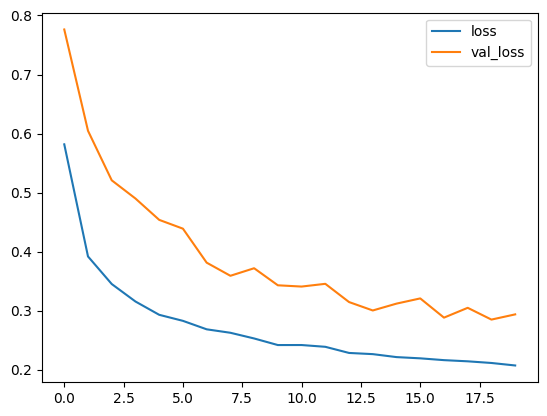

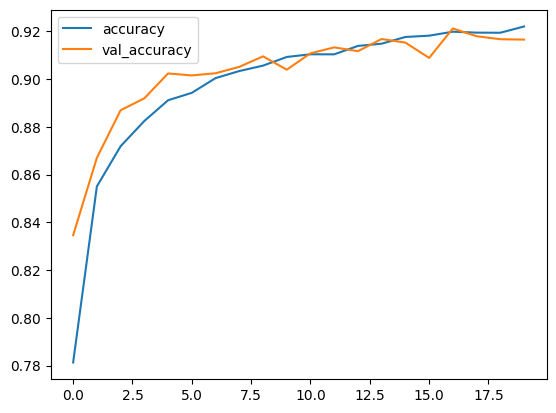

In [16]:
plot_loss_accuracy(plt, history)

Observamos que las curvas de los datasets de entrenamiento y prueba no divergen, lo que indica que **ya no se produce overfitting gracias a la activación de la funcionalidad de dropout**, y además muestran recorrido de mejora.


<br>

<font color='Blue'><b> Evaluación sobre dataset de pruebas </b></font>

A continuación vamos a visualizar unos ejemplos de imágenes y la predicción de sus probabilidades.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


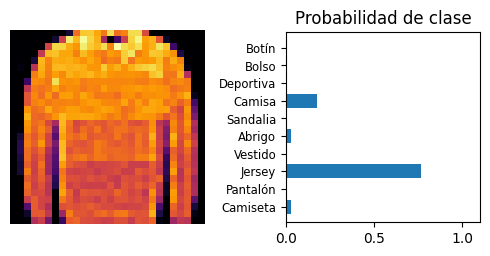

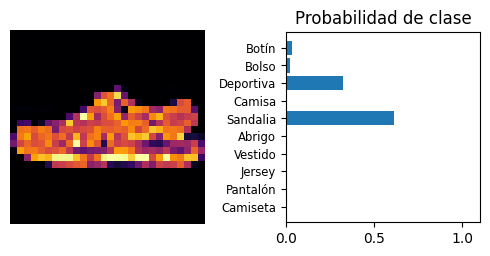

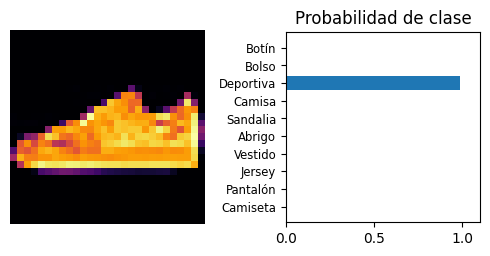

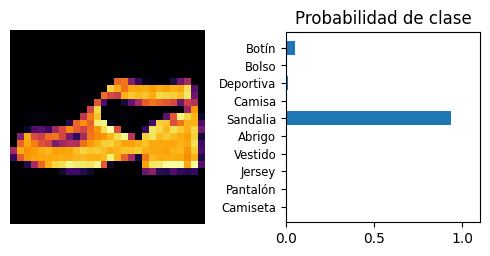

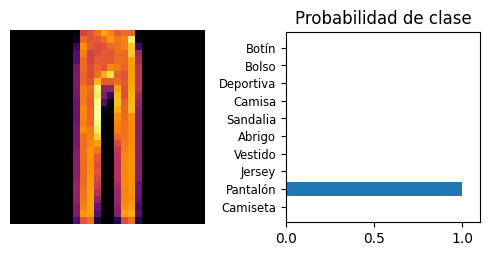

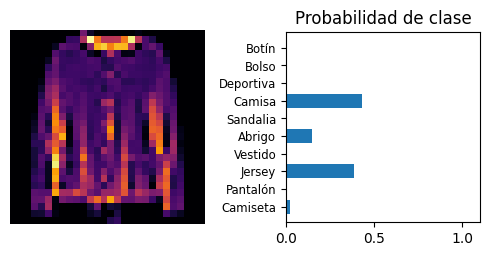

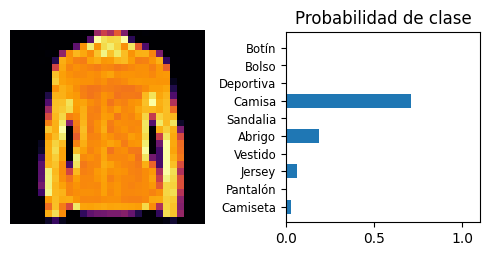

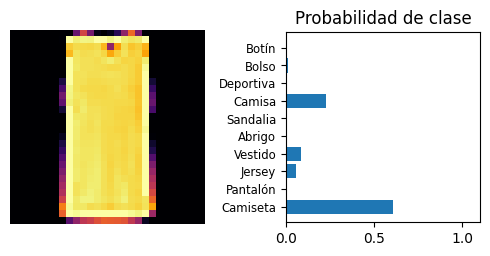

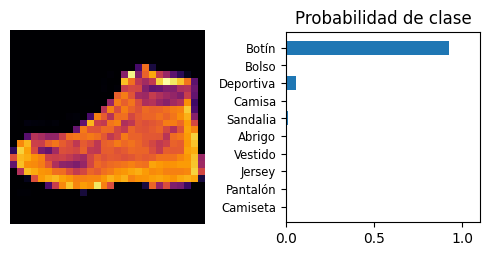

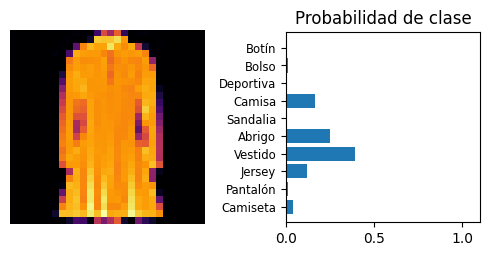

In [17]:
y_pred = model.predict(x_test) # (10000, 10)
# from tensorflow.keras import losses
# cce = losses.CategoricalCrossentropy()
# loss = cce(y_pred, y_test).numpy()

# view_classify(img.resize_(1, 28, 28), ps, version='Fashion') # pytorch
offset = 20
n_prendas = 10
for prenda in np.arange(offset, offset + n_prendas):
  img = x_test1[prenda] # (28, 28, 1)
  ps = y_pred[prenda]
  view_classify(img, ps, version='Fashion')

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9082 - loss: 0.3016


Como se puede ver, nuestro modelo alcanza una **accuracy del 91% sobre el dataset de pruebas.**

## Actividad 2: Clasificar entre perros y gatos con CNN y transferencia de aprendizaje (TensorFlow)

En esta actividad vamos a trabajar con un** dataset con imágenes de perros y gatos**, del que seleccionaremos únicamente una pequeña parte para complicar el entrenamiento.

Como primer modelo, **probaremos una CNN** parecida a la descrita anteriormente. Consideraremos este modelo como nuestra referencia, que deberán superar los modelos posteriores.

Finalmente, veremos cómo mejora la clasificación al aplicar **transferencia de aprendizaje y aumento de datos**.



### Solución

[*A continuación, haz clic para conocer la solución.*]

<font color='Blue'><b> Carga del dataset </b></font>

Para el dataset de entrenamiento vamos a **utilizar solo un 10%** del dataset original "cats_vs_dogs". Para el dataset de validación podemos utilizar el 20% habitual (del 80% al 100%).

<br>
<p> <mark> RECUERDA </mark> </p>
<hr>

Antes de importar los paquetes debes habilitar la GPU en "Entorno de ejecución -> Cambiar tipo de entorno de ejecución".

In [19]:
import tensorflow_datasets as tfds

# pretend not to have enough data for training
(dataset_train_original, dataset_validate_original), info = tfds.load(
    "cats_vs_dogs",
    split=["train[:10%]", "train[80%:]"],
    with_info=True
)
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ZP4UPG_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpbe4l23_ztfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

<font color='Blue'><b> Visualización de ejemplos </b></font>

Vemos que son imágenes en color, con tamaños distintos y mucha más resolución que Fashion-MNIST.

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


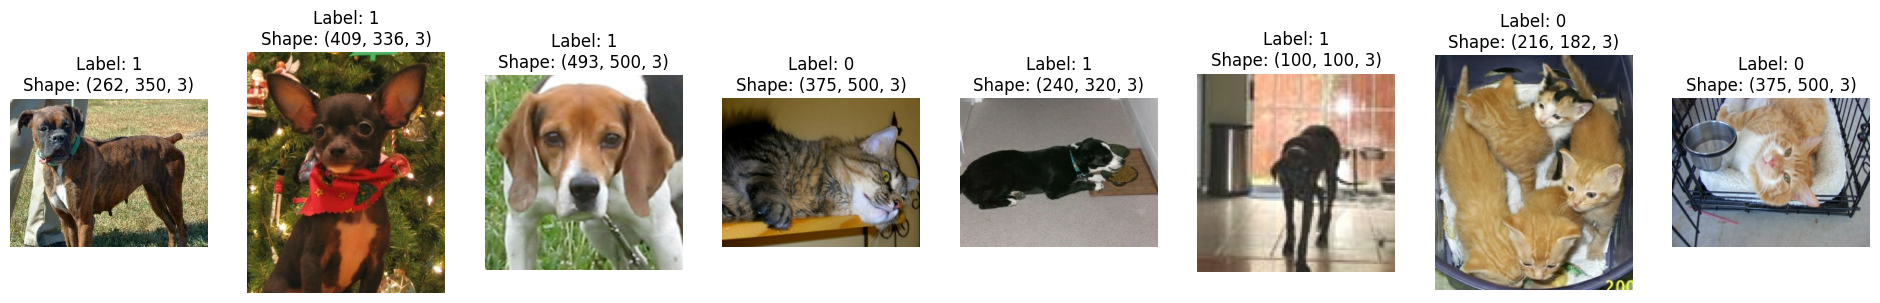

In [20]:
import matplotlib.pyplot as plt
# %matplotlib inline
index = 1
num_samples = 8
plt.figure(figsize=(24, 4))
for sample in dataset_train_original.take(num_samples):
  print(type(sample))
  image = sample['image']
  label = sample['label']
  plt.subplot(1, num_samples, index)
  plt.imshow(image)
  plt.title(f"Label: {label}\nShape: {image.shape}")
  plt.axis("off")
  index += 1


<font color='Blue'><b> Ajuste de tamaños </b></font>

Todas las imágenes deben tener el mismo tamaño, por lo que vamos a definir una función para ajustarlo y la ejecutamos en todo el dataset de entrenamiento.

In [21]:
from tensorflow.keras import models, layers, losses
import numpy as np
import time

import tensorflow as tf

def encode(sample, image_size=(128, 128)):
  image = sample["image"]
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, image_size)
  label = sample['label']
  label = tf.cast(label, tf.float32)
  return image, label

dataset_train = dataset_train_original.map(lambda sample: encode(sample))


<font color='Blue'><b> Comprobación del ajuste </b></font>

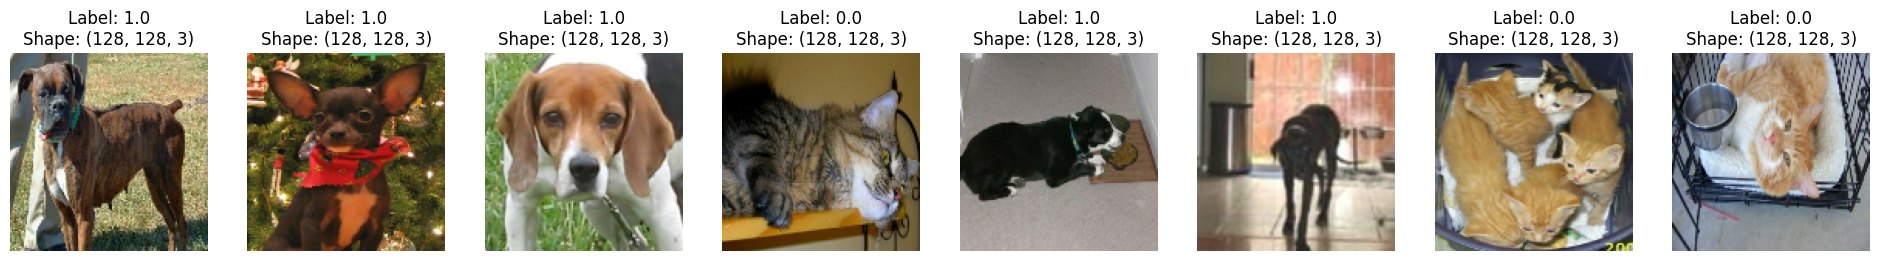

In [22]:
index = 1
num_samples = 8
plt.figure(figsize=(24, 4))
for image, label in dataset_train.take(num_samples):
  plt.subplot(1, num_samples, index)
  plt.imshow(image)
  plt.title(f"Label: {label}\nShape: {image.shape}")
  plt.axis("off")
  index += 1

<font color='Blue'><b> Procesado de los datasets </b></font>

Vamos a procesar los datasets con los siguientes métodos:

* **Cache** para acelerar el acceso.

* **Shuffle** para aleatorizarlos (solo el de entrenamiento).

* **Batch** para dividirlos en lotes.

In [23]:
dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(10000)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.map(lambda sample: encode(sample))
dataset_validate = dataset_validate.cache()
dataset_validate = dataset_validate.batch(128)

<font color='Blue'><b> Creación del modelo de referencia y entrenamiento </b></font>

Definimos un modelo de CNN en el modo Sequential, muy parecido al anterior. Las diferencias principales son la resolución de entrada, que pasa de (28, 28, 1) a (128, 128, 3), y el número de clases de salida, que pasa de 10 a 2 (codificables en una sola salida como 1 o 0), con lo que la función de activación **pasa de softmax a sigmoid** y la **función de pérdida pasa a binary_crossentropy.**

In [24]:
def cnn_model(add_dropout=False):
  model = models.Sequential()

  model.add(layers.Conv2D(
      32,
      (3, 3),
      activation="relu",
      padding="same",
      input_shape=(128, 128, 3)
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(
      64,
      (3, 3),
      activation="relu",
      padding="same",
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(
      64,
      (3, 3),
      activation="relu",
      padding="same",
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(
      128,
      (3, 3),
      activation="relu",
      padding="same",
  ))

  if add_dropout==True:
    model.add(layers.Dropout(0.5))

  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation="relu"))
  model.add(layers.Dense(1, activation="sigmoid"))

  model.summary()

  return model

def train_model(model, dataset_train, dataset_validate, epochs=20):

  model.compile(
      optimizer="adam",
      loss="binary_crossentropy",
      metrics=["accuracy"]
  )

  t_start = time.time()
  history = model.fit(
      dataset_train,
      epochs=epochs,
      validation_data=dataset_validate
  )

  t_end = time.time()
  t_train = round(t_end - t_start)
  print(f"\nTiempo de entrenamiento: {t_train} segundos")

  return history

def plot_loss_accuracy(plt, history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()
  plt.close()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.show()
  plt.close()

In [26]:
history_list = {}
epochs = 30

model = cnn_model(add_dropout=False)
history = train_model(model, dataset_train, dataset_validate, epochs=epochs)
history_list["referencia"] = history

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,179,009 (4.50 MB)

 Trainable params: 1,179,009 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 712ms/step - accuracy: 0.4776 - loss: 0.7187 - val_accuracy: 0.5600 - val_loss: 0.6920
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.5417 - loss: 0.6911 - val_accuracy: 0.4925 - val_loss: 0.7025
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.5740 - loss: 0.6816 - val_accuracy: 0.6376 - val_loss: 0.6438
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6199 - loss: 0.6445 - val_accuracy: 0.6071 - val_loss: 0.6603
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6372 - loss: 0.6299 - val_accuracy: 0.6720 - val_loss: 0.6056
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7134 - loss: 0.5777 - val_accuracy: 0.6756 - val_loss: 0.5942
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7069 - loss: 0.5749 - val_accuracy: 0.7001 - val_loss: 0.5707
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7327 - loss: 0.5418 - val_accuracy: 0.

<font color='Blue'><b> Visualización del entrenamiento con el modelo de referencia </b></font>

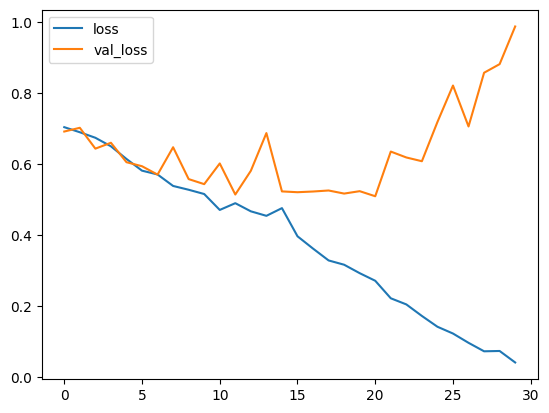

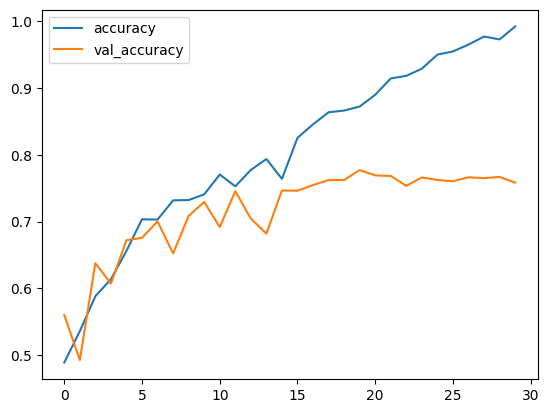

In [27]:
plot_loss_accuracy(plt, history_list["referencia"])

Vemos que **se produce overfitting** desde las primeras iteraciones.

<br>

<font color='Blue'><b> Entrenamiento del modelo de referencia con dropout </b></font>

Vamos a **activar la opción de dropout** y comprobamos si mejora la clasificación.


In [28]:
model = cnn_model(add_dropout=True)

history = train_model(model, dataset_train, dataset_validate, epochs=epochs)
history_list["referencia+dropout"] = history

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,179,009 (4.50 MB)

 Trainable params: 1,179,009 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 507ms/step - accuracy: 0.5015 - loss: 2.0650 - val_accuracy: 0.5099 - val_loss: 0.6929
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.5015 - loss: 0.6924 - val_accuracy: 0.4901 - val_loss: 0.6932
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5362 - loss: 0.6909 - val_accuracy: 0.5146 - val_loss: 0.6921
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5407 - loss: 0.6881 - val_accuracy: 0.5696 - val_loss: 0.6920
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5391 - loss: 0.6884 - val_accuracy: 0.5464 - val_loss: 0.6908
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5734 - loss: 0.6717 - val_accuracy: 0.5963 - val_loss: 0.6880
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6268 - loss: 0.6493 - val_accuracy: 0.5692 - val_loss: 0.6845
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.6266 - loss: 0.6318 - val_accuracy: 0

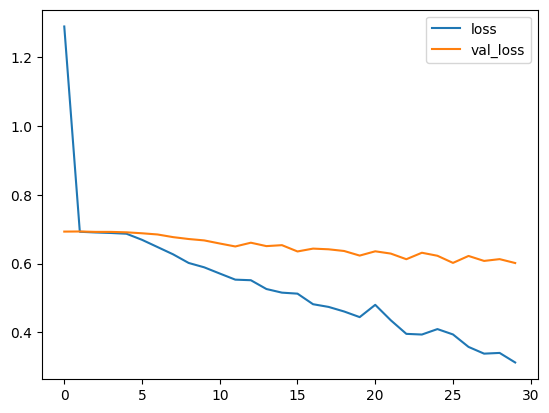

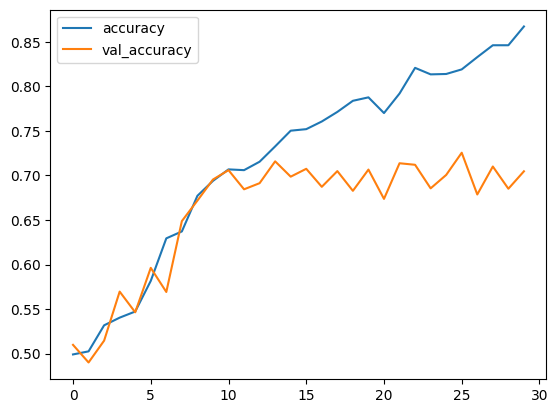

In [29]:
plot_loss_accuracy(plt, history_list["referencia+dropout"])

Vemos que, **añadiendo capas de dropout la función de pérdidas ha mejorado**, pero la accuracy no, y sigue habiendo overfitting.

<br>

<font color='Blue'><b> Entrenamiento del modelo de referencia con aumento de datos </b></font>

Vamos a realizar **aumento de datos para ver si mejora la clasificación**.

Las transformaciones que vamos a aplicar al dataset de entrenamiento son giros (de izquierda a derecha y de arriba a abajo) y cambios aleatorios en el brillo y el contraste.

In [30]:
tf.keras.backend.clear_session()

def augment(image, label):
  image_augmented = image
  image_augmented = tf.image.random_flip_left_right(image_augmented)
  image_augmented = tf.image.random_flip_up_down(image_augmented)
  image_augmented = tf.image.random_contrast(image_augmented, 0.5, 1.0)
  image_augmented = tf.image.random_brightness(image_augmented, 0.25)
  image_augmented = tf.image.random_hue(image_augmented, 0.2)
  image_augmented = tf.clip_by_value(image_augmented, 0.0, 1.0)
  return image_augmented, label

dataset_train = dataset_train_original.map(lambda sample: encode(sample))
dataset_train = dataset_train.cache()
dataset_train = dataset_train.map(lambda image, label: augment(image, label))
dataset_train = dataset_train.shuffle(10000)
dataset_train = dataset_train.batch(128)

dataset_validate = dataset_validate_original.map(lambda sample: encode(sample))
dataset_validate = dataset_validate.cache()
dataset_validate = dataset_validate.batch(128)

In [31]:
model = cnn_model(add_dropout=False)
history = train_model(model, dataset_train, dataset_validate, epochs=epochs)
history_list["referencia+aumento"] = history

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,179,009 (4.50 MB)

 Trainable params: 1,179,009 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 642ms/step - accuracy: 0.5145 - loss: 0.7233 - val_accuracy: 0.5064 - val_loss: 0.6927
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5111 - loss: 0.6928 - val_accuracy: 0.4905 - val_loss: 0.6924
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5178 - loss: 0.6921 - val_accuracy: 0.5181 - val_loss: 0.6871
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.5401 - loss: 0.6872 - val_accuracy: 0.5342 - val_loss: 0.6793
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5430 - loss: 0.6883 - val_accuracy: 0.5862 - val_loss: 0.6821
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5534 - loss: 0.6825 - val_accuracy: 0.5856 - val_loss: 0.6689
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5504 - loss: 0.6875 - val_accuracy: 0.5969 - val_loss: 0.6668
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5783 - loss: 0.6741 - val_accuracy: 0.

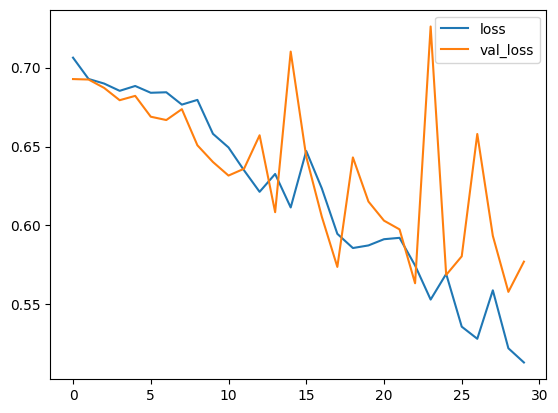

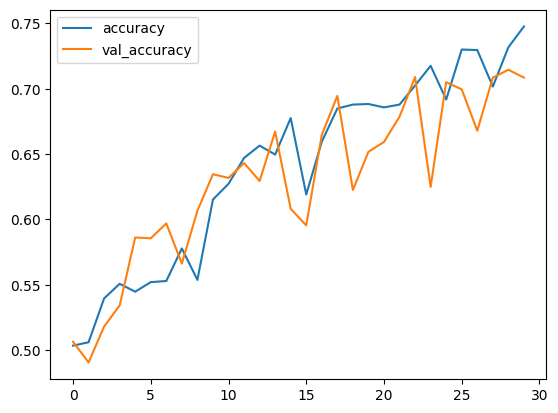

In [32]:
plot_loss_accuracy(plt, history_list["referencia+aumento"])

Vemos que el **overfitting se produce más tarde y es menos intenso**. La accuracy ha mejorado algo.

<br>

<font color='Blue'><b> Entrenamiento con transfer learning </b></font>

Vamos utilizar un modelo como VGG19, entrenado con un dataset grande como es ImageNet, y vamos a sustituir su clasificador: ImageNet está compuesto por 1000 clases pero nuestro dataset de perros y gatos solo tiene 2 clases.

Para sustituir el clasificador de VGG19 **seguimos los pasos siguientes**:

1. Cargamos solo la parte convolucional con el parámetro include_top=False.

2. Creamos un modelo en modo Sequential y añadimos la parte convolucional de VGG19.

3. Añadimos capas lineales como en el modelo anterior. En general,  la **función de activación a la salida** debe tener tantas salidas como clases haya en nuestro dataset; en nuestro caso, clasificación binaria, sabemos que con una salida es suficiente y que la sigmoide es una función de activación adecuada.

**Recuperamos el dataset sin aumento de datos.**

In [59]:
tf.keras.backend.clear_session()

# volvemos a generar dataset_train sin aumentar
dataset_train = dataset_train_original.map(lambda sample: encode(sample))
dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(10000)
dataset_train = dataset_train.batch(128)

base_net = tf.keras.applications.VGG19(
    include_top=False,
    input_shape=(128, 128, 3)
)
base_net.trainable = False
base_net.summary()

model = models.Sequential()
model.add(layers.Input((128, 128, 3)))
model.add(base_net)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,073,217 (80.39 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

<br>
<p> <mark> IMPORTANTE </mark> </p>
<hr>

Al imprimir la arquitectura vemos que hay más de 20 millones de parámetros no entrenables. Esto se debe a la opción ```base_net.trainable = False```: damos por buena la extracción de características en la parte convolucional de VGG19 y no queremos que se modifiquen los pesos de esa parte.

In [60]:
history = train_model(model, dataset_train, dataset_validate, epochs=epochs)
history_list["transfer learning"] = history

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5719 - loss: 0.8996 - val_accuracy: 0.7917 - val_loss: 0.5113
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 616ms/step - accuracy: 0.7236 - loss: 0.5357 - val_accuracy: 0.8308 - val_loss: 0.3893
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 626ms/step - accuracy: 0.8013 - loss: 0.4356 - val_accuracy: 0.8403 - val_loss: 0.3638
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.8245 - loss: 0.3891 - val_accuracy: 0.8439 - val_loss: 0.3481
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.8336 - loss: 0.3416 - val_accuracy: 0.8545 - val_loss: 0.3502
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 617ms/step - accuracy: 0.8419 - loss: 0.3401 - val_accuracy: 0.8452 - val_loss: 0.3532
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 635ms/step - accuracy: 0.8546 - loss: 0.3338 - val_accuracy: 0.8362 - val_loss: 0.3516
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.8562 - loss: 0.3166 - val_accurac

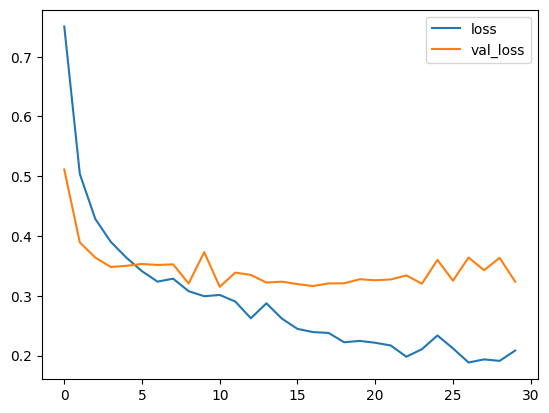

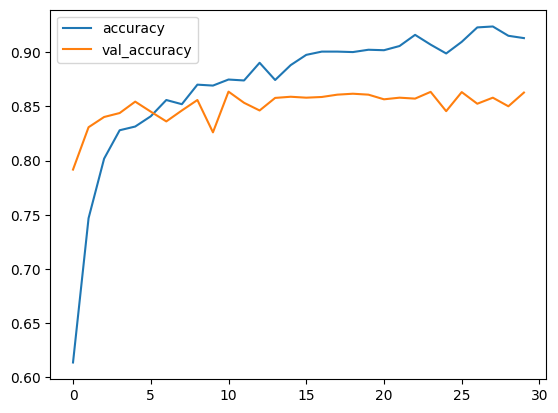

In [61]:
plot_loss_accuracy(plt, history_list["transfer learning"])

**Utilizando transferencia de aprendizaje hemos conseguido mejorar claramente con respecto al modelo de referencia**, tanto en disminución de loss como en incremento de accuracy, si bien sigue produciéndose algo de overfitting.

Como contrapartida, al ser un modelo más complejo **tarda más en entrenar.**

<br>

<font color='Blue'><b> Comparativa de la métrica de validación (val_accuracy) </b></font>

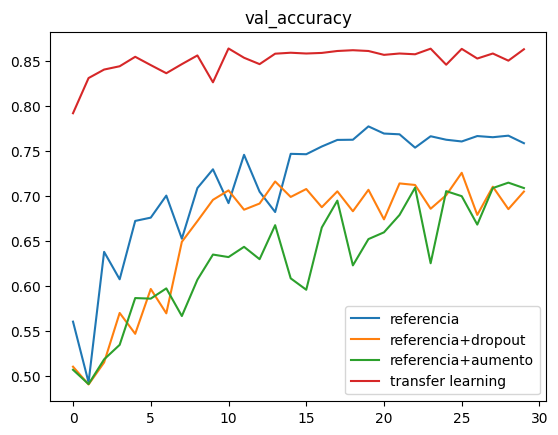

In [62]:
for training_name, history in history_list.items():
  plt.plot(history.history["val_accuracy"], label=training_name)

plt.legend()
plt.title("val_accuracy")
plt.show()
plt.close()

# **IDEAS CLAVE**
<br>
<hr>
<p> <h1> <center> <strong> Machine Learning en Imágenes y Video </center> </strong> </h1> </p>
<hr>
<br>

*	**El Procesado de Imagen está evolucionando de forma espectacular** debido al Deep Learning.

* Las **CNN** siguen siendo uno de los modelos básicos para muchas aplicaciones de Procesado de Imagen.

*	Hay **multitud de datasets** de imágenes **que pueden utilizarse.**

*	Hay **multitud de modelos pre-entrenados que pueden ayudar a entrenar con mejor desempeño**, gracias al *Transfer Learning*.
